In [1]:
from pathlib import Path
import sys

sys.path.append(str(Path().resolve().parent))

In [2]:
from math import exp
import matplotlib.pyplot as plt
import numpy as np

from scikit_quri.circuit import create_farhi_neven_ansatz
from scikit_quri.qnn.generation import QNNGenerator
from quri_parts.algo.optimizer import LBFGS

n_qubit = 5
depth = 10
circuit = create_farhi_neven_ansatz(n_qubit, depth)
qnn = QNNGenerator(circuit, LBFGS(), "same", 4.0, 5)

# prob_listつまり、確率分布を生成する
prob_list = np.zeros(32)
ua = 32 * 2 / 7
ub = 32 * 5 / 7
v = 32 * 1 / 8
prob_sum = 0
for i in range(32):
    prob_list[i] = exp(-(ua - i) * (ua - i) / (2 * v * v)) + exp(-(ub - i) * (ub - i) / (2 * v * v))
    prob_sum += prob_list[i]

for i in range(32):
    prob_list[i] /= prob_sum

# prob_list が、理想的な確率分布になる。

# prob_listの確率分布をもとに、10000個のデータを作る
datas = np.random.choice(a=range(32), size=10000, p=prob_list)


maxiter = 120
qnn.fit(datas, maxiter)

v1.2.0
 iter:119/120 cost:optimizer_state.cost=8.993662229139862e-065


In [3]:
data_param = qnn.predict()

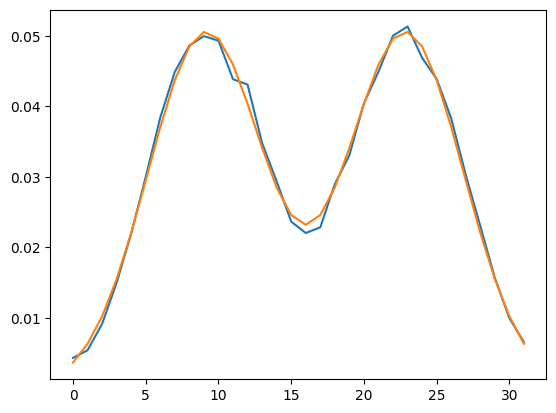

In [4]:
plt.plot(list(range(0, 32)), data_param)
plt.plot(list(range(0, 32)), prob_list)